# Setup

In [1]:
import json
import sys
import os

sys.path.append('../')

from xami_utils import utils

In [2]:
dataset_dir = '../../XAMI-model/data/xami_dataset/train/'

annotations_file = dataset_dir+'_annotations.coco.json' 

with open(annotations_file, 'r') as f:
    data = json.load(f)

# Check dataset duplicates

In [3]:
filenames = [img['file_name'] for img in data['images']]
duplicates = {}
second_duplicates = {}

for filename in filenames:
	id = '_'.join(filename.split('_')[:2])
	if id in duplicates:
		second_duplicates[id] = 1
	else:
		duplicates[id] = 1

len(second_duplicates.keys()), second_duplicates.keys()

(0, dict_keys([]))

# BBox correction

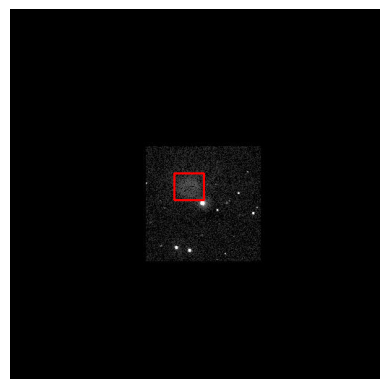

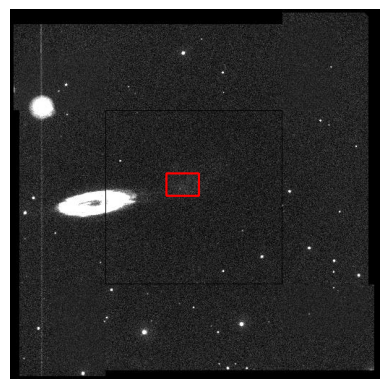

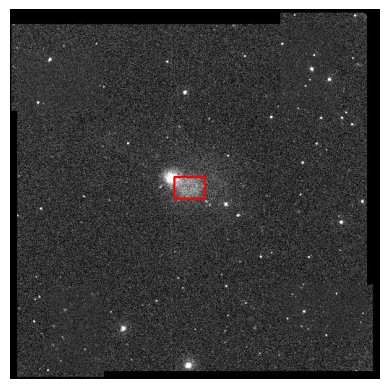

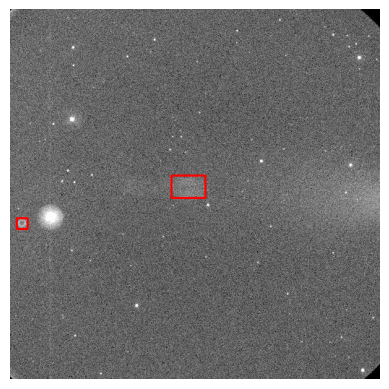

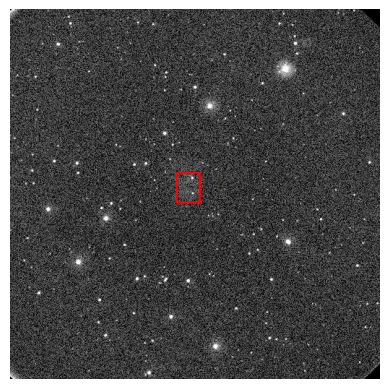

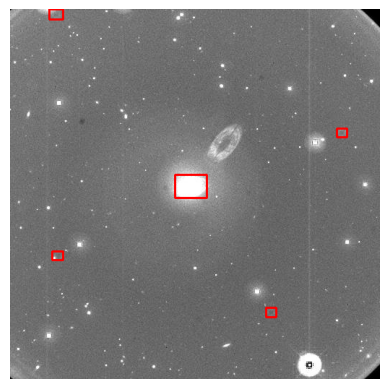

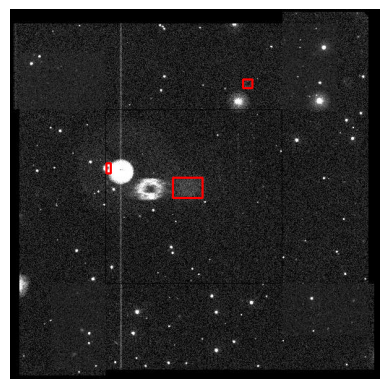

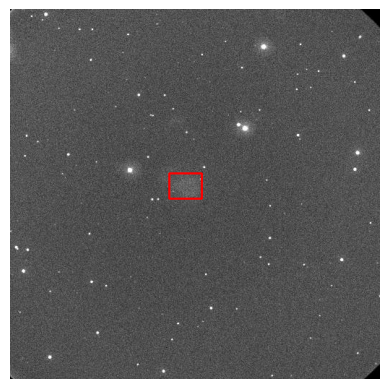

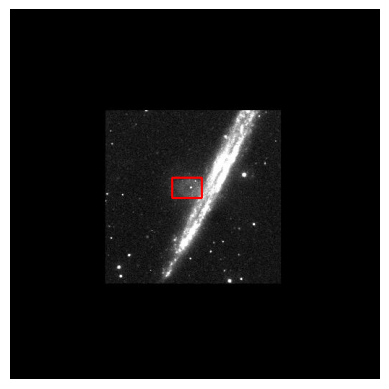

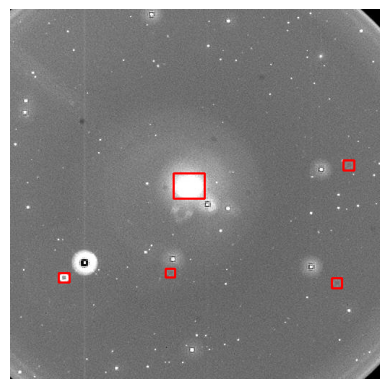

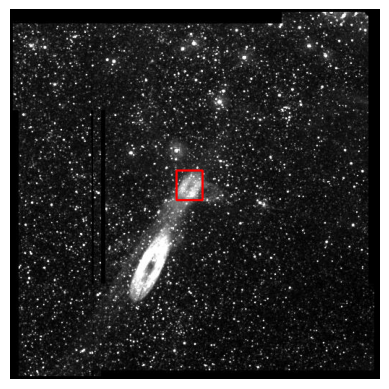

In [4]:
# This code is used to correct Roboflow internal bugs when exporting the dataset 
# in COCO Segmentation format. The bug consists in bounding boxes that have wider area than usual.

correct_dataset = True
splits = [] #['train', 'valid']

if correct_dataset:
    if len(splits) == 0:
        annotations_file = os.path.join(dataset_dir, '_annotations.coco.json')
        with open(annotations_file, 'r') as file:
            coco_data = json.load(file)
        
        corrected_annotations = utils.correct_bboxes(coco_data)
        coco_data['annotations'] = corrected_annotations
                
        with open(annotations_file, 'w') as file:
            json.dump(coco_data, file, indent=4)
        
        print(f"Updated bounding boxes and categories for {annotations_file}.")
    else:  
        for split in splits:
            annotations_file = os.path.join(dataset_dir, split, '_annotations.coco.json')
            with open(annotations_file, 'r') as file:
                coco_data = json.load(file)
            
            corrected_annotations = utils.correct_bboxes(coco_data['annotations'])
            coco_data['annotations'] = corrected_annotations
                    
            with open(annotations_file, 'w') as file:
                json.dump(coco_data, file, indent=4)
            
            print(f"Updated bounding boxes and categories for {annotations_file}.")

# Update categories in annotations file

In [ ]:
data['categories']

In [ ]:
data['categories'][0]['name'] = 'central-ring'
data['categories'][0]['supercategory'] = 'artefacts'
data['categories'][1]['name'] = 'other'
data['categories'][2]['name'] = 'read-out-streak'
data['categories'][3]['name'] = 'smoke-ring'
data['categories'][4]['name'] = 'star-loop'
data['categories'] = data['categories'][:-1]

In [ ]:
data['categories']

**Update classes**

In [ ]:
for i in range(len(data['annotations'])):
    data['annotations'][i]['category_id'] = data['annotations'][i]['category_id'] - 1

In [ ]:
with open(annotations_file, 'w') as f:
    json.dump(data, f, indent=4)

# Merge json annotation files

In [ ]:
# utils.merge_coco_jsons('../xmm_om_artefacts_512-38-COCO/train/_annotations.coco.json',\
#                 '../xmm_om_artefacts_512-38-COCO/export/_annotations.coco.json',\
#                 '../xmm_om_artefacts_512-38-COCO/train/_annotations.coco.json')